# APPL STOCK ANALYSIS 

## phase 1 : Understanding and cleaning data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt  

In [2]:
df = pd.read_csv("AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...,...
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700


In [9]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200,2022
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400,2022
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000,2022
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700,2022
10408,2022-03-24,171.059998,174.139999,170.210007,174.070007,174.070007,90018700,2022


In [3]:
print(df.shape)

(10409, 7)


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
# Check for duplicated records
duplicates = df.duplicated()

# Count the number of duplicated records
num_duplicates = duplicates.sum()

# Print the number of duplicated records
print("Number of duplicated records:", num_duplicates)

Number of duplicated records: 0


## phase 2 :Data Preparation

In [9]:
# Convert numerical columns to numeric data type
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...,...
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700


In [10]:
#corr 
corr_=df.corr()
print(corr_)

               Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.999945  0.999928  0.999861   0.999494 -0.189987   
High       0.999945  1.000000  0.999910  0.999931   0.999589 -0.189387   
Low        0.999928  0.999910  1.000000  0.999929   0.999547 -0.190955   
Close      0.999861  0.999931  0.999929  1.000000   0.999641 -0.190182   
Adj Close  0.999494  0.999589  0.999547  0.999641   1.000000 -0.193284   
Volume    -0.189987 -0.189387 -0.190955 -0.190182  -0.193284  1.000000   
Year       0.643184  0.642811  0.643496  0.643105   0.628721  0.176063   

               Year  
Open       0.643184  
High       0.642811  
Low        0.643496  
Close      0.643105  
Adj Close  0.628721  
Volume     0.176063  
Year       1.000000  


In [19]:
#corr bettwen 
import pandas as pd

# Assuming you have a DataFrame called 'df' containing the stock market data

# Calculate correlation between volume and close price
#to understand the relationship between trading activity and the closing price of a financial instrument
volume_close_corr = df['Volume'].corr(df['Close'])
print("Correlation between Volume and Close Price:", volume_close_corr)

# Calculate correlation between open price and close price
#provides valuable insights into the relationship between the initial trading price and the final trading price
open_close_corr = df['Open'].corr(df['Close'])
print("Correlation between Open Price and Close Price:", open_close_corr)

Correlation between Volume and Close Price: -0.19018194404881425
Correlation between Open Price and Close Price: 0.9998613877781358


In [10]:
#summary statistics :
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10409.000000,10409.000000,10409.000000,10409.000000,10409.000000,1.040900e+04
mean,13.959910,14.111936,13.809163,13.966757,13.350337,3.321778e+08
std,30.169244,30.514878,29.835055,30.191696,29.911132,3.393344e+08
min,0.049665,0.049665,0.049107,0.049107,0.038384,0.000000e+00
25%,0.281964,0.287946,0.274554,0.281250,0.234799,1.247604e+08
50%,0.468750,0.477679,0.459821,0.468750,0.386853,2.199680e+08
75%,14.217857,14.364286,14.043571,14.206071,12.188149,4.126108e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,7.421641e+09


In [12]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...,...
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700


In [8]:
# Group the data by year and calculate the average closing price and total trading volume
df["Date"]=pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
grouped_data =df.groupby("Year").agg({"Close":"mean",'Volume': 'sum'})
print(grouped_data)

           Close        Volume
Year                          
1980    0.135903    1344851200
1981    0.108548    8196944000
1982    0.085459   21365008000
1983    0.167274   44513011200
1984    0.119651   41979033600
1985    0.090233   45492272000
1986    0.144913   53323222400
1987    0.347751   59771308800
1988    0.370884   41292977600
1989    0.371953   50905825600
1990    0.335373   44401940800
1991    0.468701   57347651200
1992    0.489309   41137913600
1993    0.366310   56452928000
1994    0.304291   57155896000
1995    0.361966   74266539200
1996    0.222495   53194220800
1997    0.160418   71963360000
1998    0.272900  115194195200
1999    0.515805  137102705600
2000    0.816283  120301596800
2001    0.361061   94657796800
2002    0.341776   77013927200
2003    0.331156   71230252800
2004    0.634410  121801668800
2005    1.667001  182400982400
2006    2.528951  215698966000
2007    4.581211  246995985600
2008    5.070679  285981206000
2009    5.243362  143253686800
2010    

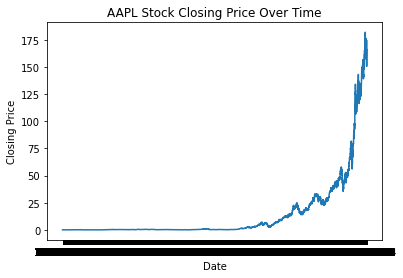

In [13]:
import matplotlib.pyplot as plt

# Line chart of closing price over time
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('AAPL Stock Closing Price Over Time')
plt.show()

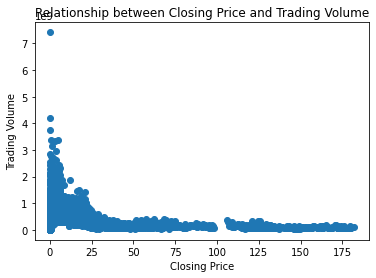

In [14]:
# Scatter plot of closing price vs. trading volume
plt.scatter(df['Close'], df['Volume'])
plt.xlabel('Closing Price')
plt.ylabel('Trading Volume')
plt.title('Relationship between Closing Price and Trading Volume')
plt.show()

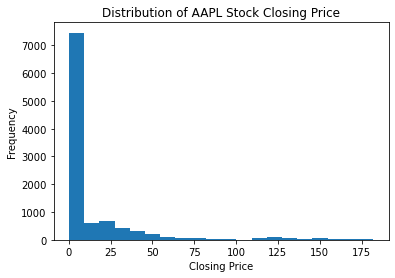

In [15]:
# Histogram of closing price
plt.hist(df['Close'], bins=20)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of AAPL Stock Closing Price')
plt.show()

In [8]:
#max in Adjclose 
max_adj_close_date = df['Date'][df['Adj Close'].idxmax()]

print("Date(s) with the highest Adj Close:")
print(max_adj_close_date)

Date(s) with the highest Adj Close:
2022-01-03


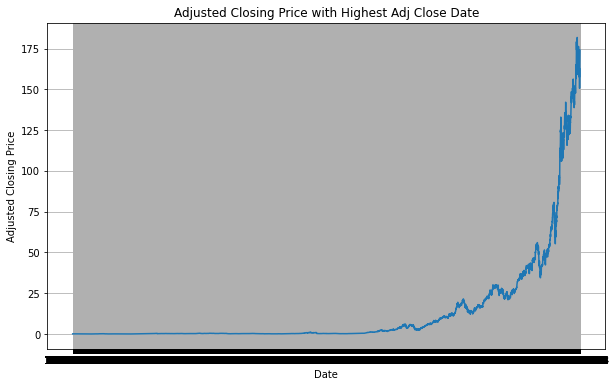

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['Date'], df['Adj Close'])
ax.scatter(df.loc[df['Date'] == max_adj_close_date, 'Date'], df.loc[df['Date'] == max_adj_close_date, 'Adj Close'], color='red', marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Closing Price')
ax.set_title('Adjusted Closing Price with Highest Adj Close Date')
ax.grid(True)
plt.show()

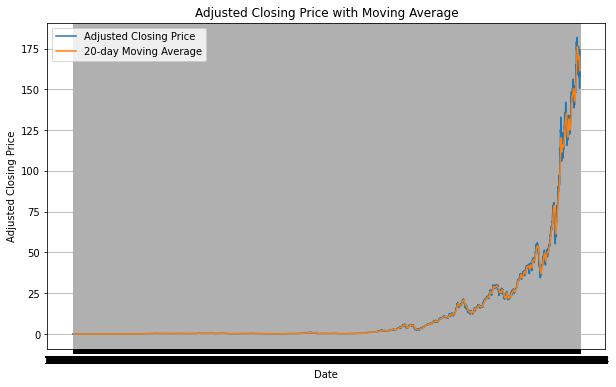

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the moving average of the adjusted closing price
window = 20  # Specify the moving average window size
df['MA_Adj_Close'] = df['Adj Close'].rolling(window=window).mean()

# Visualize the adjusted closing price and the moving average
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Adj Close'], label='Adjusted Closing Price')
plt.plot(df['Date'], df['MA_Adj_Close'], label=f'{window}-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.title('Adjusted Closing Price with Moving Average')
plt.legend()
plt.grid(True)
plt.show()